In [1]:
import requests
import json
import csv
import pandas as pd

In [2]:
lat = "40.735102"
lon = "-73.687908"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json()
json_file

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/40.7351,-73.6879',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-73.6879, 40.7351]},
 'properties': {'@id': 'https://api.weather.gov/p

In [3]:
forecast = json_file["properties"]["forecast"]
new_request = requests.get(forecast)

json = new_request.json()
json

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-73.6969171, 40.754601],
    [-73.7014502, 40.7329217],
    [-73.6728411, 40.7294852],
    [-73.6683021, 40.7511642],
    [-73.6969171, 40.754601]]]},
 'properties': {'updated': '2023-03-21T14:17:09+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2023-03-21T15:38:23+00:00',
  'updateTime': '2023-03-21T14:17:09+00:00',
  'validTimes': '2023-03-21T08:00:00+00:00/P7DT5H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 29.8704},
  'periods': [{'number': 1,
    'name': 'Today',
    'startTime': '2023-03-21T11:00:00-04:00',
    'endTime': '2023-03-21T18:00:00-04:00',
    'isDaytime': Tr

In [5]:
weather = json["properties"]["periods"]
for x in weather:
    name = x["name"]
    temp = x["temperature"]
    detail = x["detailedForecast"]
    print(name)
    print(temp)
    print(detail)

Today
59
Sunny, with a high near 59. Southwest wind 8 to 13 mph.
Tonight
40
Mostly cloudy, with a low around 40. Southwest wind 7 to 10 mph.
Wednesday
56
A slight chance of rain showers after 2pm. Partly sunny. High near 56, with temperatures falling to around 54 in the afternoon. South wind 5 to 15 mph. Chance of precipitation is 20%.
Wednesday Night
46
A slight chance of rain showers. Mostly cloudy, with a low around 46. South wind 9 to 16 mph. Chance of precipitation is 20%.
Thursday
62
A chance of rain showers. Cloudy. High near 62, with temperatures falling to around 58 in the afternoon. Southwest wind 9 to 13 mph. Chance of precipitation is 50%. New rainfall amounts less than a tenth of an inch possible.
Thursday Night
45
A chance of rain showers. Mostly cloudy. Low around 45, with temperatures rising to around 51 overnight. Chance of precipitation is 40%. New rainfall amounts less than a tenth of an inch possible.
Friday
52
A chance of rain showers. Cloudy, with a high near 52. 

In [7]:
data = open("weather_data.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(data)
csv_writer.writerow(["name", "temperature", "description"])

weather = json["properties"]["periods"]
weather

for x in weather:
    name = x["name"]
    temp = x["temperature"]
    detail = x["detailedForecast"]
    
    csv_writer.writerow([name, temp, detail])
    
data.close()

In [8]:
s = pd.read_csv("weather_data.csv")
s

,name,temperature,description
0,Today,59,"Sunny, with a high near 59. Southwest wind 8 t..."
1,Tonight,40,"Mostly cloudy, with a low around 40. Southwest..."
2,Wednesday,56,A slight chance of rain showers after 2pm. Par...
3,Wednesday Night,46,A slight chance of rain showers. Mostly cloudy...
4,Thursday,62,A chance of rain showers. Cloudy. High near 62...
5,Thursday Night,45,A chance of rain showers. Mostly cloudy. Low a...
6,Friday,52,"A chance of rain showers. Cloudy, with a high ..."
7,Friday Night,40,"A chance of rain showers. Cloudy, with a low a..."
8,Saturday,49,"Rain showers likely. Cloudy, with a high near ..."
9,Saturday Night,41,"Rain showers likely before 2am. Mostly cloudy,..."


In [9]:
from matplotlib import pyplot as plt
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

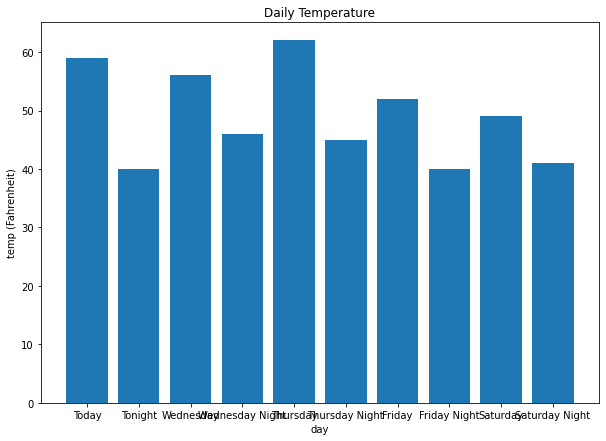

In [14]:
d = pd.DataFrame(s)

day = d["name"]
temp = d["temperature"]

report = plt.figure(figsize = (10,7))
plt.bar(day[0:10], temp[0:10])

plt.xlabel("day")
plt.ylabel("temp (Fahrenheit)")
plt.title("Daily Temperature")

plt.show